<a href="https://colab.research.google.com/github/Donalizasaji/DL/blob/main/2348515_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE_STUDY- FASHION DATASET

In [ ]:
import numpy as np
import pandas as pd

import os

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

LOADING OF DATASET

In [ ]:
DATASET_PATH = "/content/Fashion_Dataset[1].csv"
print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


In [ ]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg  
5  2011  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg  
6  2012  Ethnic               Fabindia Men Striped Green Shirt  30805.jpg  
7  2012  Casual                  Jealous 21 Women Purple Shirt  26960.jpg  
8  2012  Casual                       Puma Men Pack of 3 Socks  29114.jpg  
9  2016  Casual                         Skagen Men Black Watch  30039.jpg

PREPROCESSING

In [ ]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

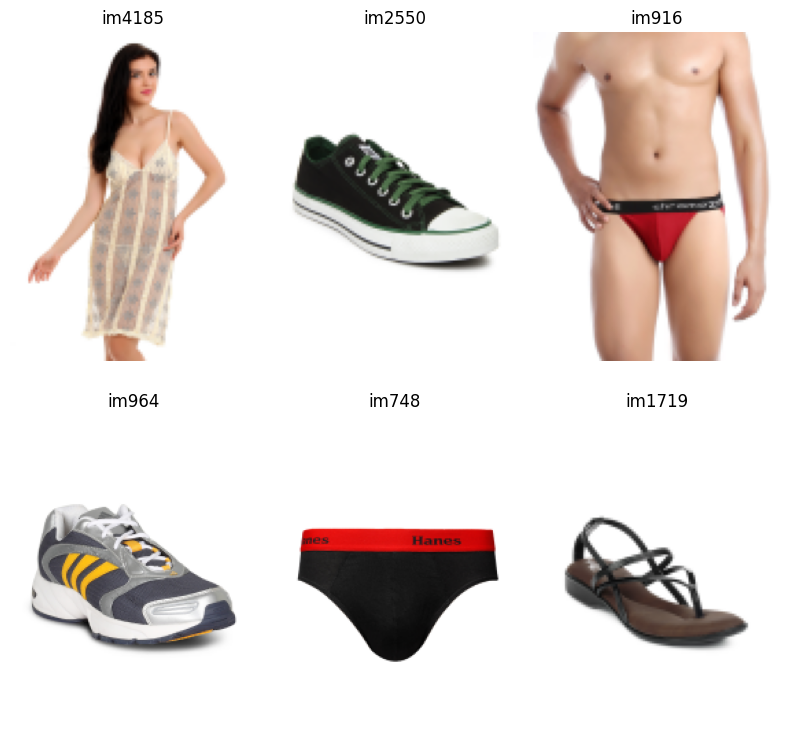

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='articleType'>

In [ ]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

2024-04-22 21:10:34.493168: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 21:10:34.493286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 21:10:34.673122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.15.0'

In [ ]:
load_image(df.iloc[0].image).shape

(240, 180, 3)

RESNET50

In [ ]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 380 µs (started: 2024-04-22 21:11:05 +00:00)


In [ ]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)  # El -1 le hace un flatten al array

time: 1.03 ms (started: 2024-04-22 21:11:05 +00:00)


In [ ]:
df.iloc[0].image

'15970.jpg'

time: 3.95 ms (started: 2024-04-22 21:11:06 +00:00)


In [ ]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


I0000 00:00:1713820274.053171      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(2048,)

time: 6.99 s (started: 2024-04-22 21:11:07 +00:00)


(240, 180, 3)
[ 5.9391603  2.3722546  0.        ...  1.35955    0.        10.89319  ]


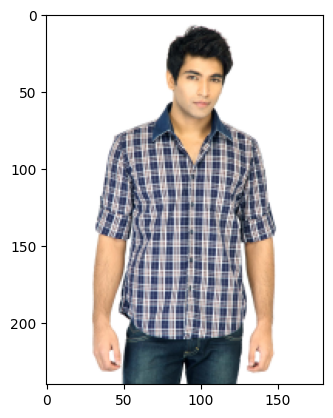

time: 331 ms (started: 2024-04-22 21:11:14 +00:00)


In [ ]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [ ]:
df.shape


(5000, 11)

time: 3.21 ms (started: 2024-04-22 21:11:15 +00:00)


In [ ]:
%%time
#import swifter

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

0          1         2          3         4         5          6     \
0  5.939160   2.372255  0.000000   3.246125  0.957503  2.766371   8.801993   
1  5.790422   9.593651  0.000000   9.431676  0.287236  0.259950  17.028765   
2  0.000000   3.162254  0.484699   0.172290  2.609550  3.840861   3.426140   
3  5.882206   1.958613  0.000000  12.519882  0.000000  0.000000   9.383595   
4  0.245965  17.383430  0.493824   3.374473  2.567370  0.000000   6.482543   

       7         8         9     ...       2038       2039       2040  \
0  6.304135  0.805902  1.697342  ...   2.396975   0.000000   1.801752   
1  3.037463  0.136340  0.000000  ...   1.670570   0.013895  10.338687   
2  0.253250  1.098904  1.418283  ...   0.434926  14.092854   3.018748   
3  3.781614  0.000000  1.490623  ...  17.825480   0.000000   3.592506   
4  5.862638  0.000000  3.164861  ...   4.464022   0.447079   1.448137   

        2041      2042      2043      2044      2045       2046       2047  
0  20.561758  3.954432  0.000000  8.289474  1.359550   0.000000  10.893190  
1   4.784726  0.189143  0.000000  7.739132  0.372702   0.000000   8.903799  
2   2.134511  2.549054  0.377383  6.180354  0.636620  14.018167  11.415048  
3   2.042306  0.000000  0.000000  6.656782  1.457313   1.694210   1.403327  
4  12.884134  0.000000  0.397493  5.028079  1.939697   0.000000  11.485402  

[5 rows x 2048 columns]

time: 8min 28s (started: 2024-04-22 21:11:17 +00:00)


In [ ]:
print(len(df))
print(df.shape)

5000
(5000, 11)
time: 478 µs (started: 2024-04-22 21:19:50 +00:00)


In [ ]:
print(map_embeddings.shape)
print(df_embs.shape)

(5000,)
(5000, 2048)
time: 553 µs (started: 2024-04-22 21:19:52 +00:00)


In [ ]:
print(type(map_embeddings))
print(type(df_embs))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
time: 491 µs (started: 2024-04-22 21:19:55 +00:00)


In [ ]:
map_embeddings

0       [5.9391603, 2.3722546, 0.0, 3.2461252, 0.95750...
1       [5.7904224, 9.593651, 0.0, 9.431676, 0.2872358...
2       [0.0, 3.1622539, 0.48469937, 0.1722902, 2.6095...
3       [5.8822064, 1.9586129, 0.0, 12.519882, 0.0, 0....
4       [0.24596548, 17.38343, 0.49382412, 3.374473, 2...
                              ...                        
4995    [0.0, 0.32107437, 2.286409, 1.3582468, 0.46296...
4996    [2.0786476, 6.5254416, 2.159687, 1.5775168, 11...
4997    [3.1842966, 14.53885, 6.3061357, 0.0, 3.361123...
4998    [0.495718, 0.7545707, 5.361828, 2.2513816, 5.0...
4999    [2.8762753, 25.317072, 0.0, 2.8694048, 4.97140...
Name: image, Length: 5000, dtype: object

time: 11.2 ms (started: 2024-04-22 21:19:57 +00:00)


In [ ]:
df_embs

0          1         2          3          4         5     \
0     5.939160   2.372255  0.000000   3.246125   0.957503  2.766371   
1     5.790422   9.593651  0.000000   9.431676   0.287236  0.259950   
2     0.000000   3.162254  0.484699   0.172290   2.609550  3.840861   
3     5.882206   1.958613  0.000000  12.519882   0.000000  0.000000   
4     0.245965  17.383430  0.493824   3.374473   2.567370  0.000000   
...        ...        ...       ...        ...        ...       ...   
4995  0.000000   0.321074  2.286409   1.358247   0.462967  9.163936   
4996  2.078648   6.525442  2.159687   1.577517  11.479071  1.587009   
4997  3.184297  14.538850  6.306136   0.000000   3.361124  6.701035   
4998  0.495718   0.754571  5.361828   2.251382   5.059063  4.944999   
4999  2.876275  25.317072  0.000000   2.869405   4.971403  0.568798   

           6         7         8         9     ...       2038       2039  \
0      8.801993  6.304135  0.805902  1.697342  ...   2.396975   0.000000   
1     17.028765  3.037463  0.136340  0.000000  ...   1.670570   0.013895   
2      3.426140  0.253250  1.098904  1.418283  ...   0.434926  14.092854   
3      9.383595  3.781614  0.000000  1.490623  ...  17.825480   0.000000   
4      6.482543  5.862638  0.000000  3.164861  ...   4.464022   0.447079   
...         ...       ...       ...       ...  ...        ...        ...   
4995   2.768784  5.362480  0.000000  0.000000  ...   0.000000   9.330206   
4996   0.560374  0.000000  2.502825  0.495667  ...   0.000000   1.124645   
4997   0.729837  0.295340  0.252367  3.175588  ...   0.000000   1.471542   
4998   6.025791  8.423919  0.000000  0.397840  ...   0.536618  12.328606   
4999   0.000000  5.165746  0.000000  0.000000  ...   3.623355   0.000000   

           2040       2041      2042       2043       2044      2045  \
0      1.801752  20.561758  3.954432   0.000000   8.289474  1.359550   
1     10.338687   4.784726  0.189143   0.000000   7.739132  0.372702   
2      3.018748   2.134511  2.549054   0.377383   6.180354  0.636620   
3      3.592506   2.042306  0.000000   0.000000   6.656782  1.457313   
4      1.448137  12.884134  0.000000   0.397493   5.028079  1.939697   
...         ...        ...       ...        ...        ...       ...   
4995   6.249802   4.409920  5.866274   6.166029   3.572120  3.106219   
4996   0.093256   5.718976  3.174089   0.000000  12.184796  0.562720   
4997   1.482231  22.654335  2.425650  12.427621   8.393603  0.000000   
4998   4.785470   0.000000  4.667123   5.777931   3.781088  2.007550   
4999   9.653904   3.372166  0.000000   0.000000  11.082537  0.000000   

           2046       2047  
0      0.000000  10.893190  
1      0.000000   8.903799  
2     14.018167  11.415048  
3      1.694210   1.403327  
4      0.000000  11.485402  
...         ...        ...  
4995   0.000000   2.379196  
4996   6.811857   0.000000  
4997   9.616655   3.375088  
4998   8.635354   4.528856  
4999   0.000000  15.469982  

[5000 rows x 2048 columns]

time: 25.5 ms (started: 2024-04-22 21:19:59 +00:00)


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999857, 0.712804  , 0.45375025, 0.67937225],
       [0.712804  , 0.9999993 , 0.41515303, 0.83330894],
       [0.45375025, 0.41515303, 0.99999875, 0.44629467],
       [0.67937225, 0.83330894, 0.44629467, 0.9999993 ]], dtype=float32)

time: 708 ms (started: 2024-04-22 21:20:06 +00:00)


In [ ]:
print(type(cosine_sim))
print(cosine_sim.shape)


<class 'numpy.ndarray'>
(5000, 5000)
time: 508 µs (started: 2024-04-22 21:20:10 +00:00)


In [ ]:
cosine_sim[0]

array([0.99999857, 0.712804  , 0.45375025, ..., 0.5767342 , 0.44954407,
       0.5491875 ], dtype=float32)

time: 3.9 ms (started: 2024-04-22 21:20:12 +00:00)


In [ ]:
indices = pd.Series(range(len(df)), index=df.index)
indices

def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #el True ordena los elementos en orden descendente  ___ x[1] devuelve ña similitud en si ya que eñ x[0] es el indice que se genero con ennumerate
    sim_scores = sim_scores[1:top_n+1]  #no se toma la 0 ya que obviamente una imagen siempre va a tener similitud de 1 consiugo misma
    idx_rec    = [i[0] for i in sim_scores]  #devuelve el inidice a las imagenes
    idx_sim    = [i[1] for i in sim_scores]  #devuelve las similitudes

    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.92443055, 0.9223509, 0.9187668, 0.914625, 0.9138005])

time: 11.4 ms (started: 2024-04-22 21:20:17 +00:00)


In [ ]:
df.index

RangeIndex(start=0, stop=5000, step=1)

time: 2.14 ms (started: 2024-04-22 21:20:19 +00:00)


In [ ]:
indices[12]

12

time: 2.67 ms (started: 2024-04-22 21:20:21 +00:00)


In [ ]:
cosine_sim[12]

array([0.47288322, 0.4604057 , 0.525462  , ..., 0.5085511 , 0.6974615 ,
       0.49842966], dtype=float32)

time: 3.17 ms (started: 2024-04-22 21:20:24 +00:00)


In [ ]:
cosine_sim[12][12]

1.0

time: 2.18 ms (started: 2024-04-22 21:20:28 +00:00)


In [ ]:
indices

0          0
1          1
2          2
3          3
4          4
        ... 
4995    4995
4996    4996
4997    4997
4998    4998
4999    4999
Length: 5000, dtype: int64

time: 3.75 ms (started: 2024-04-22 21:20:30 +00:00)


In [ ]:
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

time: 1.42 s (started: 2024-04-22 21:20:33 +00:00)


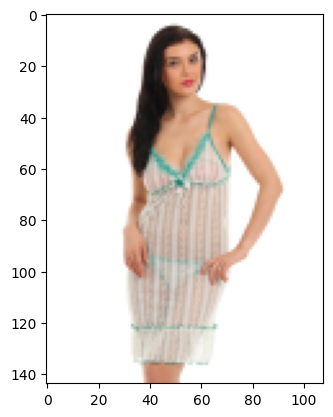

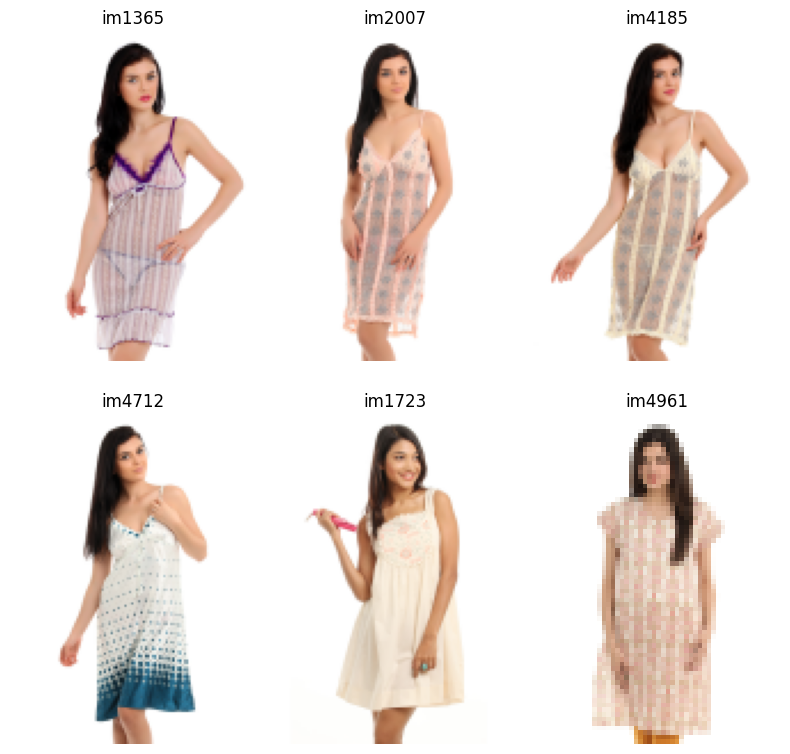

time: 1.09 s (started: 2024-04-22 21:20:37 +00:00)


In [ ]:
idx_ref = 878

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

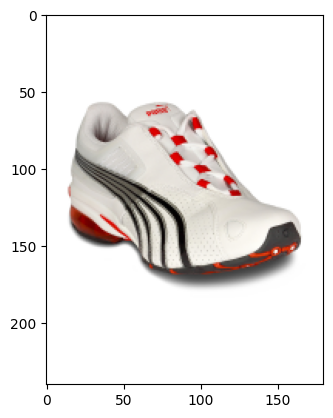

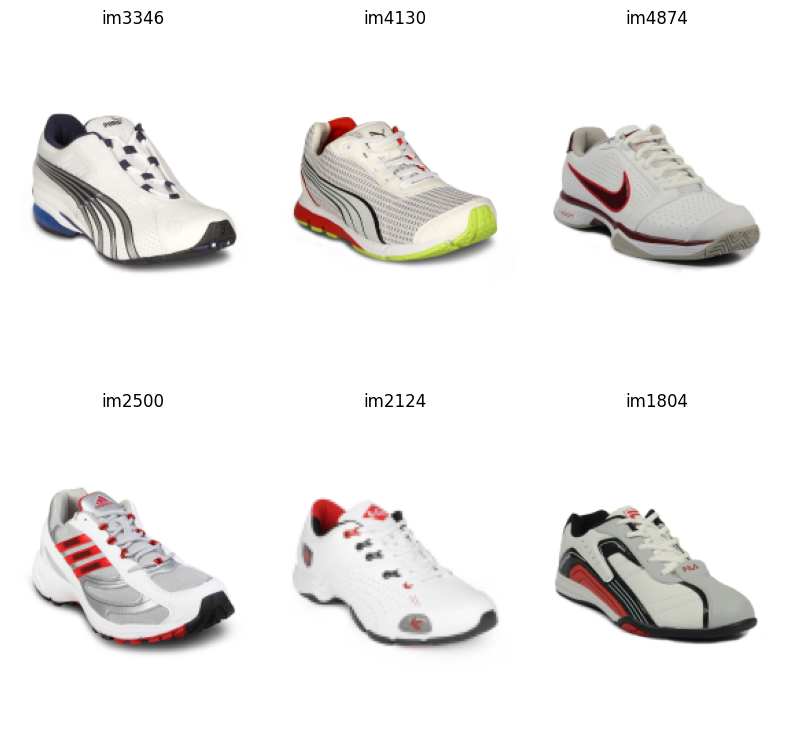

time: 1.34 s (started: 2024-04-22 21:20:40 +00:00)


In [ ]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

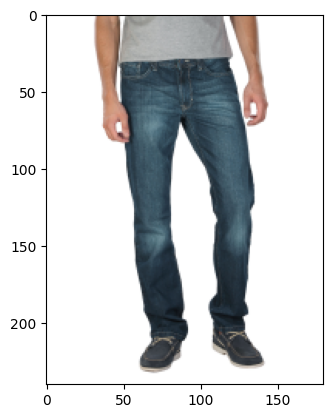

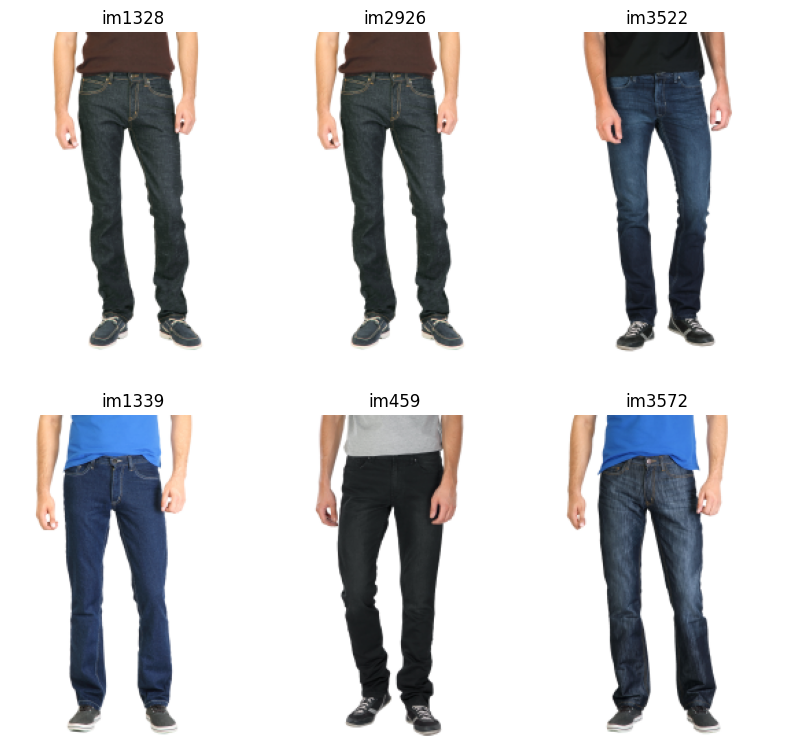

time: 1.45 s (started: 2024-04-22 21:20:44 +00:00)


In [ ]:
idx_ref = 1

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

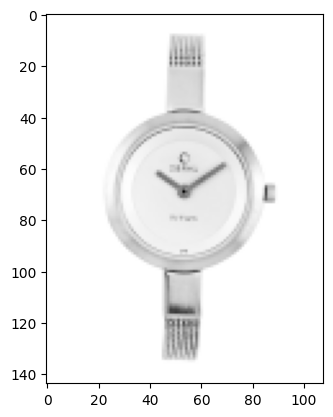

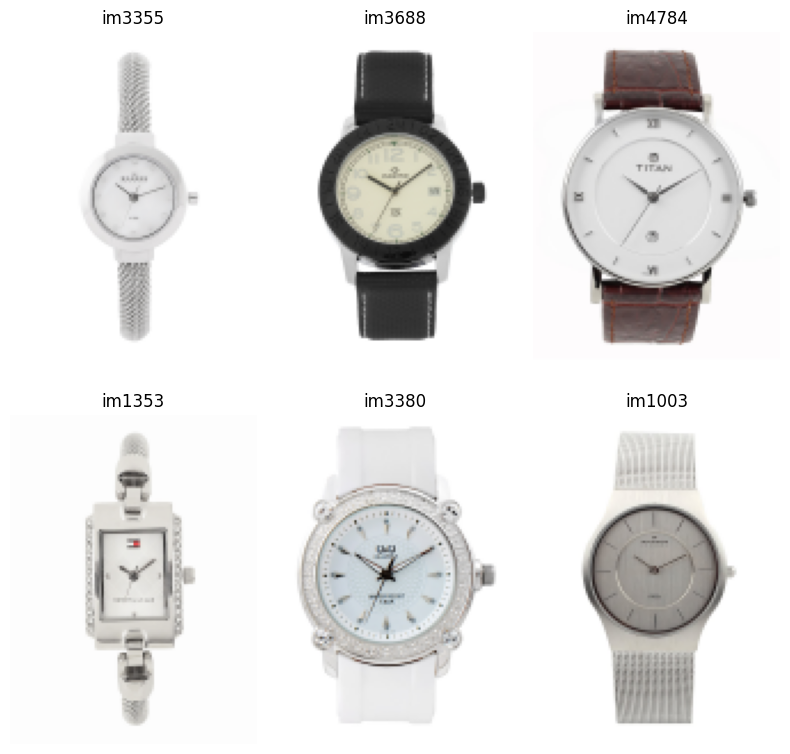

time: 1.16 s (started: 2024-04-22 21:20:48 +00:00)


In [ ]:
idx_ref = 2

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

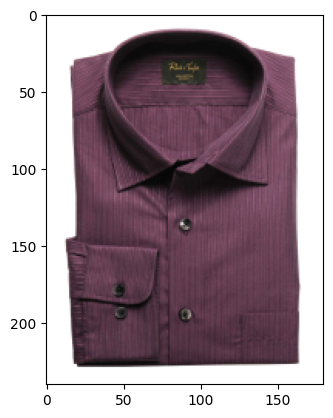

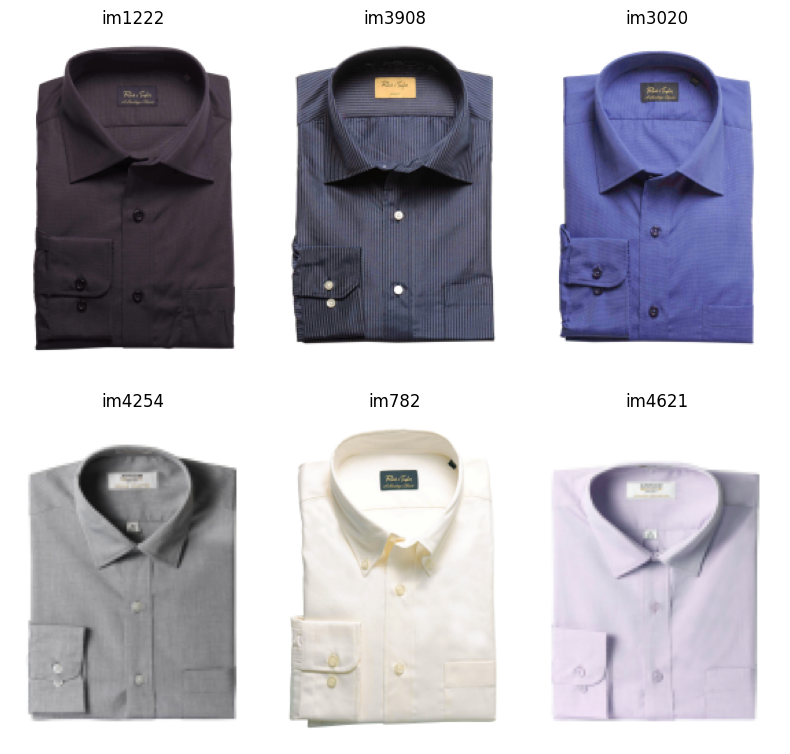

time: 1.51 s (started: 2024-04-22 21:20:51 +00:00)


In [ ]:
idx_ref = 15

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

In [ ]:
idx_ref = 60

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

time: 1.25 s (started: 2024-04-22 21:20:55 +00:00)


In [ ]:
idx_ref = 78

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

time: 1.37 s (started: 2024-04-22 21:20:59 +00:00)


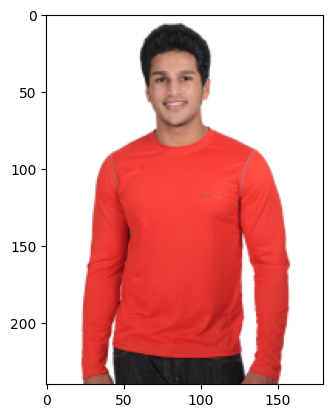

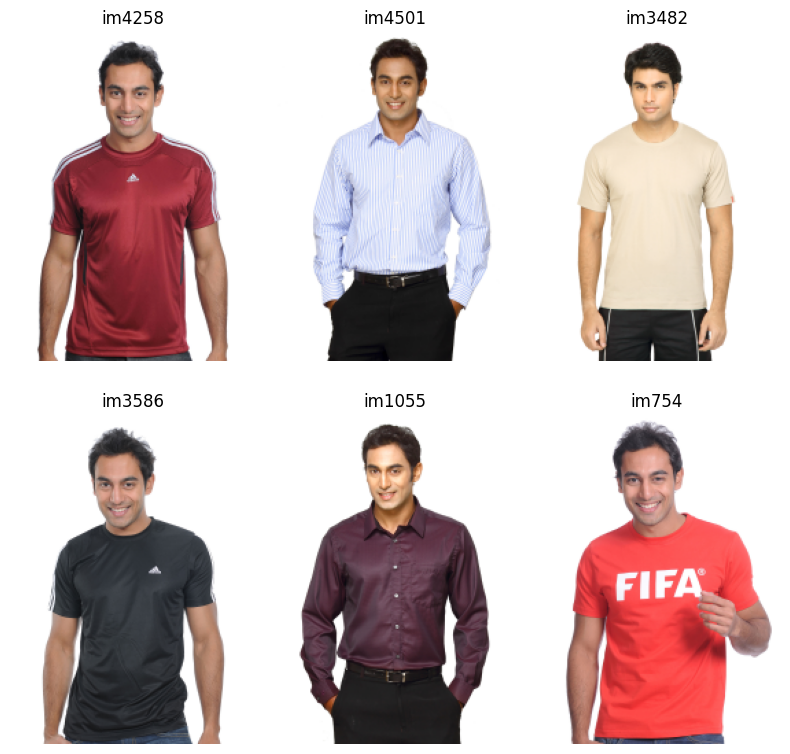

time: 1.77 s (started: 2024-04-22 21:21:03 +00:00)


In [ ]:
idx_ref =4785

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

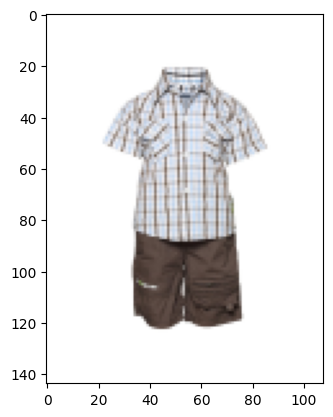

time: 1.15 s (started: 2024-04-22 21:21:07 +00:00)


In [ ]:
idx_ref = 57

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)